<a href="https://colab.research.google.com/github/loiskem94/Python_Analysis/blob/main/Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Dataset**

Orginal Dataset - 
[Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)

"This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals."




In [ ]:
# Link to Gdrive for Body signal of smoking 
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Imports
    
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats.stats import ttest_ind
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
    
smoking_df = pd.read_csv('/content/gdrive/My Drive/Lois Kim | Data Analyst Portfolio /Statistical Analysis Project/Dataset: Body signal of smoking.csv')


##**Data Exploration**

In [ ]:
# View the raw dataset and defining the dataframe
smoking_df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1,1,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1,1,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1,1,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1,1,...,12.5,1,0.6,16,14,22,Y,0,N,0


In [ ]:
smoking_df.shape

(55692, 27)

In [ ]:
# Original table
smoking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  int64  
 9   hearing(right)       55692 non-null  int64  
 10  systolic             55692 non-null  int64  
 11  relaxation           55692 non-null  int64  
 12  fasting blood sugar  55692 non-null  int64  
 13  Cholesterol          55692 non-null  int64  
 14  triglyceride         55692 non-null  int64  
 15  HDL                  55692 non-null 

In [ ]:
# Calculating BMI for statistical testing between smokers and non smokers
smoking_df = smoking_df.rename(columns={"height(cm)": "height", "weight(kg)": "weight"})
smoking_df = smoking_df.assign (bmi = smoking_df.weight/((smoking_df.height/100)**2))

In [ ]:
# Narrowing down the data to smokers and nonsmoker patients with BMI higher than 25.0
over25_smokers = (smoking_df['bmi']>=25) & (smoking_df['smoking']==1)
overweight_smokers =smoking_df.iloc[over25_smokers.values]
overweight_smokers.head()

,ID,gender,age,height,weight,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,bmi
17,19,M,35,165,70,87.5,1.0,0.8,1,1,...,1,0.9,37,43,30,Y,0,Y,1,25.711662
21,26,M,40,180,85,82.0,1.5,1.5,1,1,...,1,0.8,42,65,37,Y,0,N,1,26.234568
24,31,M,45,175,80,91.0,1.0,1.2,1,1,...,2,0.7,30,62,71,Y,0,N,1,26.122449
25,32,M,35,180,90,90.0,1.5,1.5,1,1,...,1,1.0,30,54,99,Y,0,Y,1,27.777778
27,34,M,60,160,70,91.0,0.7,0.7,1,1,...,1,1.0,31,41,70,Y,0,N,1,27.343750


In [ ]:
over25_nonsmokers = (smoking_df['bmi']>=25) & (smoking_df['smoking'] ==0)
overweight_nonsmokers= smoking_df.iloc[over25_nonsmokers.values]
overweight_nonsmokers.head()

,ID,gender,age,height,weight,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,bmi
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,1,1.0,19,26,18,Y,0,Y,0,25.711662
7,7,M,45,165,90,96.0,1.2,1.0,1,1,...,1,1.3,38,71,111,Y,0,Y,0,33.057851
8,9,F,50,150,60,85.0,0.7,0.8,1,1,...,1,0.8,31,31,14,Y,0,N,0,26.666667
11,12,M,30,170,75,87.0,1.2,1.2,1,1,...,1,1.1,34,69,64,Y,0,Y,0,25.951557
14,15,F,45,165,75,108.0,1.2,1.5,1,1,...,1,0.6,20,23,19,Y,1,Y,0,27.548209


In [ ]:
# Also, separating the data with patient over BMI 25.0
over25 = (smoking_df['bmi']>=25)
over25 = smoking_df.iloc[over25.values]
over25.head()

,ID,gender,age,height,weight,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,bmi
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,1,1.0,19,26,18,Y,0,Y,0,25.711662
7,7,M,45,165,90,96.0,1.2,1.0,1,1,...,1,1.3,38,71,111,Y,0,Y,0,33.057851
8,9,F,50,150,60,85.0,0.7,0.8,1,1,...,1,0.8,31,31,14,Y,0,N,0,26.666667
11,12,M,30,170,75,87.0,1.2,1.2,1,1,...,1,1.1,34,69,64,Y,0,Y,0,25.951557
14,15,F,45,165,75,108.0,1.2,1.5,1,1,...,1,0.6,20,23,19,Y,1,Y,0,27.548209


In [ ]:
# Descriptive statistics to review the means for over BMI 25.0 table
over25.describe()

,ID,age,height,weight,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
count,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,...,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000
mean,27879.791103,43.537164,165.993739,77.064482,90.160983,1.029201,1.028923,1.024944,1.024641,125.954656,...,118.621895,15.072445,1.105484,0.923556,28.789840,34.852606,50.372803,0.232024,0.433448,27.873549
std,16058.670266,12.172533,8.971762,10.900288,7.213706,0.514612,0.532259,0.155960,0.155034,13.244684,...,42.266995,1.458980,0.453161,0.216130,20.817278,31.838711,52.432605,0.422135,0.495564,2.385391
min,3.000000,20.000000,130.000000,45.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,1.000000,5.000000,1.000000,0.100000,7.000000,4.000000,6.000000,0.000000,0.000000,25.390625
25%,13964.000000,35.000000,160.000000,70.000000,85.100000,0.800000,0.800000,1.000000,1.000000,118.000000,...,95.000000,14.200000,1.000000,0.800000,20.000000,19.000000,23.000000,0.000000,0.000000,25.951557
50%,27900.500000,40.000000,165.000000,75.000000,90.000000,1.000000,1.000000,1.000000,1.000000,126.000000,...,117.000000,15.300000,1.000000,0.900000,25.000000,27.000000,35.000000,0.000000,0.000000,27.548209
75%,41684.250000,50.000000,170.000000,85.000000,94.400000,1.200000,1.200000,1.000000,1.000000,134.000000,...,141.000000,16.100000,1.000000,1.000000,32.000000,41.000000,58.000000,0.000000,1.000000,29.296875
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,1810.000000,21.100000,6.000000,10.300000,1090.000000,1612.000000,999.000000,1.000000,1.000000,42.448980


In [ ]:
overweight_nonsmokers.describe()

,ID,age,height,weight,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
count,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,...,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.000000,11220.0,11220.000000
mean,27757.494118,45.453654,163.255348,74.413102,89.118021,1.006061,1.000766,1.030392,1.028520,125.854991,...,119.929857,14.606872,1.102941,0.892923,28.226649,32.424332,40.752674,0.199733,0.0,27.820048
std,16054.908356,12.806857,9.631889,10.912998,7.227053,0.563874,0.582272,0.171671,0.166462,13.420656,...,40.898253,1.535083,0.447244,0.225636,23.903732,34.739768,44.447173,0.399817,0.0,2.349652
min,3.000000,20.000000,130.000000,45.000000,61.100000,0.100000,0.100000,1.000000,1.000000,74.000000,...,1.000000,5.000000,1.000000,0.100000,7.000000,4.000000,6.000000,0.000000,0.0,25.390625
25%,13893.250000,40.000000,155.000000,65.000000,84.000000,0.800000,0.800000,1.000000,1.000000,118.000000,...,96.000000,13.600000,1.000000,0.800000,20.000000,18.000000,19.000000,0.000000,0.0,25.951557
50%,27565.000000,45.000000,165.000000,75.000000,89.000000,1.000000,1.000000,1.000000,1.000000,125.000000,...,118.000000,14.700000,1.000000,0.900000,24.000000,25.000000,28.000000,0.000000,0.0,27.343750
75%,41604.250000,55.000000,170.000000,80.000000,93.500000,1.200000,1.200000,1.000000,1.000000,134.000000,...,141.000000,15.700000,1.000000,1.000000,31.000000,37.000000,46.000000,0.000000,0.0,29.136316
max,55690.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,1260.000000,19.600000,6.000000,10.000000,1090.000000,1612.000000,999.000000,1.000000,0.0,42.448980


In [ ]:
overweight_smokers.describe()


,ID,age,height,weight,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,...,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8584.0,8584.000000
mean,28039.643406,41.032153,169.573043,80.530056,91.524219,1.059448,1.065727,1.017824,1.019571,126.084925,...,116.912279,15.680988,1.108807,0.963595,29.525979,38.026561,62.947111,0.274231,1.0,27.943479
std,16063.117372,10.788850,6.467912,9.862377,6.964990,0.440223,0.456159,0.132319,0.138530,13.010715,...,43.935625,1.085041,0.460786,0.195955,15.875521,27.268498,59.005155,0.446152,0.0,2.429676
min,8.000000,20.000000,145.000000,55.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,1.000000,7.100000,1.000000,0.100000,9.000000,5.000000,8.000000,0.000000,1.0,25.390625
25%,14090.750000,35.000000,165.000000,75.000000,87.000000,0.900000,0.900000,1.000000,1.000000,118.000000,...,93.000000,15.000000,1.000000,0.900000,21.000000,22.000000,30.000000,0.000000,1.0,25.951557
50%,28298.000000,40.000000,170.000000,80.000000,91.000000,1.000000,1.000000,1.000000,1.000000,126.000000,...,116.000000,15.700000,1.000000,1.000000,26.000000,31.000000,45.000000,0.000000,1.0,27.548209
75%,41793.500000,50.000000,175.000000,85.000000,95.500000,1.200000,1.200000,1.000000,1.000000,134.000000,...,139.000000,16.400000,1.000000,1.100000,33.000000,46.000000,75.000000,1.000000,1.0,29.384757
max,55691.000000,80.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,...,1810.000000,21.100000,6.000000,10.300000,244.000000,577.000000,999.000000,1.000000,1.0,41.666667


##**Statistical Testing**


Correlation Testing to review the correlation between BMI and smoking. 

In [ ]:
smoking_df.iloc[0]

ID                             0
gender                         F
age                           40
height                       155
weight                        60
waist(cm)                   81.3
eyesight(left)               1.2
eyesight(right)              1.0
hearing(left)                  1
hearing(right)                 1
systolic                     114
relaxation                    73
fasting blood sugar           94
Cholesterol                  215
triglyceride                  82
HDL                           73
LDL                          126
hemoglobin                  12.9
Urine protein                  1
serum creatinine             0.7
AST                           18
ALT                           19
Gtp                           27
oral                           Y
dental caries                  0
tartar                         Y
smoking                        0
bmi                    24.973985
Name: 0, dtype: object

In [ ]:
smoking_df['smoking'].corr(smoking_df['bmi'])

0.10696678562547156

In [ ]:
stats.pearsonr(smoking_df['smoking'],smoking_df['bmi'])

(0.1069667856254716, 2.1649220388745713e-141)

In [ ]:
smoking_df[['hemoglobin','serum creatinine', 'systolic']].corr()

,hemoglobin,serum creatinine,systolic
hemoglobin,1.000000,0.371382,0.186514
serum creatinine,0.371382,1.000000,0.072288
systolic,0.186514,0.072288,1.000000


Text(0.5, 1.0, 'BMI > 25 Correlation between Hemoglobin and Serum Creatinine')

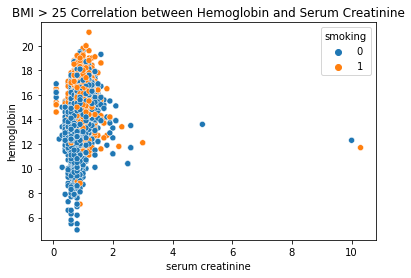

In [ ]:
sns.scatterplot(x='serum creatinine', y='hemoglobin', hue='smoking', data=over25)
plt.title('BMI > 25 Correlation between Hemoglobin and Serum Creatinine')


**Conclusion** There is significant correlation between these two variables to generalize out to the population. The relationship is positive. 

##**Hypothesis 1**
Null Hypothesis #1: 

H₀: µ = µ₀ There is no statically significant difference between smokers with a BMI over 25 and non-smokers with a BMI over 25 within the hemoglobin level

**Alternate Hypothesis #1:** 

**Hₐ: µ ≠ µ₀ There is a statically significant difference between smokers with a BMI over 25 and non-smokers with a BMI over 25 within the hemoglobin level**


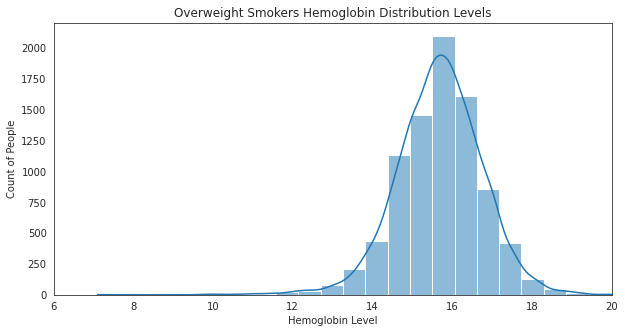

In [ ]:
# Plotting Distribution within plots of Hemoglobin levels between Smokers and NonSmokers 
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.histplot(overweight_smokers['hemoglobin'],kde=True, bins=25)
plt.xlabel('Hemoglobin Level')
plt.ylabel('Count of People')
plt.title('Overweight Smokers Hemoglobin Distribution Levels')
plt.xlim(6, 20)
plt.show()

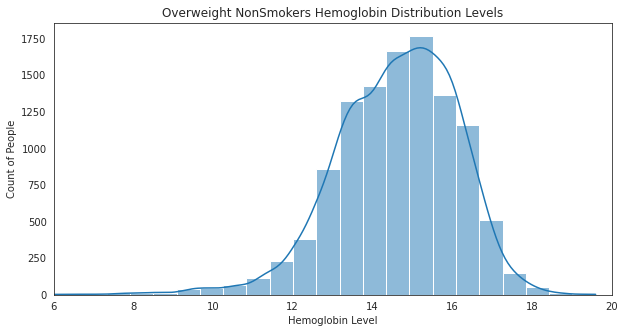

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.histplot(overweight_nonsmokers['hemoglobin'], kde=True, bins=25) 
plt.xlabel('Hemoglobin Level')
plt.ylabel('Count of People')
plt.title('Overweight NonSmokers Hemoglobin Distribution Levels')
plt.xlim(6, 20)
plt.show()

In [ ]:
# Calculating TTest
stats.ttest_ind(overweight_smokers['hemoglobin'],overweight_nonsmokers['hemoglobin'])

Ttest_indResult(statistic=55.1408150337107, pvalue=0.0)

In [ ]:
# Calculating confidence interval
sample_1_n = overweight_nonsmokers.shape[0]
sample_2_n = overweight_smokers.shape[0]
sample_1_mean = overweight_nonsmokers['hemoglobin'].mean()
sample_2_mean = overweight_smokers['hemoglobin'].mean()
sample_1_var = overweight_nonsmokers['hemoglobin'].var()
sample_2_var = overweight_smokers['hemoglobin'].var()

In [ ]:
import math 
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in the means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+". ")

The difference in the means at the 95% confidence interval is between 1.0375961663030282 and 1.110636287061358. 


In [ ]:
def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_difference = sample_2_mean - sample_1_mean 
  std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error  
  ci_upper = mean_difference + margin_of_error
  return("The difference in the means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+". ")

ci_smoking = get_95_ci(overweight_nonsmokers['hemoglobin'], overweight_smokers['hemoglobin'])
print(ci_smoking)

The difference in the means at the 95% confidence interval is between 1.0375961663030282 and 1.110636287061358. 


Text(0.5, 1.0, 'Overweight NonSmokers and Smokers Hemoglobin levels')

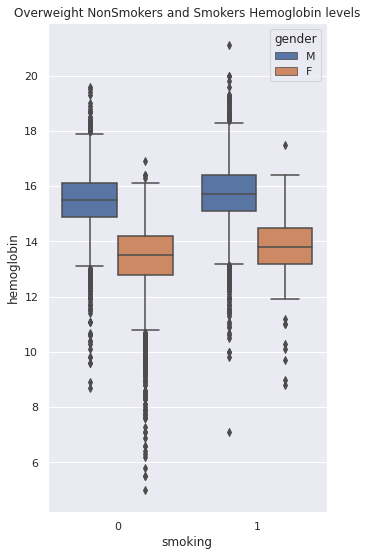

In [ ]:
# Reviewing hemoglobin levels between overweight smokers and nonsmokers on boxplot
sns.set()
plt.figure(figsize=(5,9))
sns.boxplot(y='hemoglobin', x='smoking', hue='gender',data=over25)
plt.title('Overweight NonSmokers and Smokers Hemoglobin levels')

##**Hypothesis #2**
**Null Hypothesis #2:** 

**H₀: µ = µ₀ There is no statistically significant difference between smokers with a BMI over 25 and non-smokers with a BMI over 25 within the systolic level**



Alternate Hypothesis #2: 

Hₐ: µ ≠ µ₀ There is a statistically significant difference between smokers with a BMI over 25 and non-smokers with a BMI over 25 within the systolic level

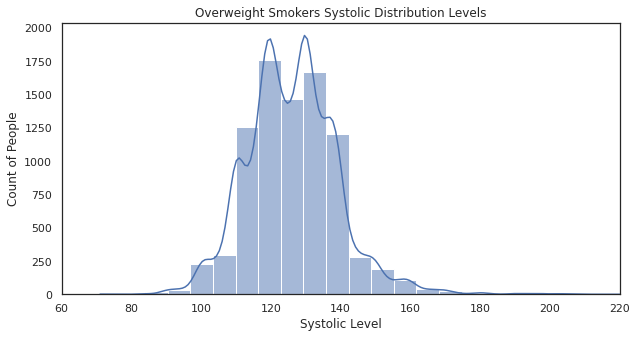

In [ ]:
# Plotting Distribution on Systolic between Smokers and NonSmokers
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.histplot(overweight_smokers['systolic'], kde=True, bins=25) 
plt.xlabel('Systolic Level')
plt.ylabel('Count of People')
plt.title('Overweight Smokers Systolic Distribution Levels')
plt.xlim(60, 220)
plt.show()

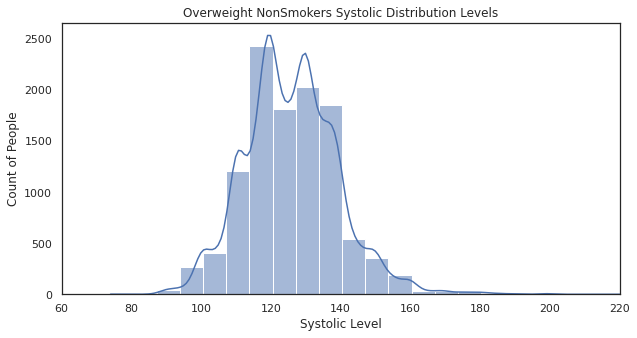

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.histplot(overweight_nonsmokers['systolic'], kde=True, bins=25) 
plt.xlabel('Systolic Level')
plt.ylabel('Count of People')
plt.title('Overweight NonSmokers Systolic Distribution Levels')
plt.xlim(60, 220)
plt.show()

In [ ]:
# Calculating TTest 
stats.ttest_ind(overweight_smokers['systolic'],overweight_nonsmokers['systolic'])

Ttest_indResult(statistic=1.2106878375787833, pvalue=0.22602951527546153)

In [ ]:
# Calculating Confidence Interval 
ci_smoking = get_95_ci(overweight_nonsmokers['systolic'], overweight_smokers['systolic'])
print(ci_smoking)

The difference in the means at the 95% confidence interval is between -0.14077621627627063 and 0.6006449269563403. 


Text(0.5, 1.0, 'Overweight NonSmokers and Smokers Systolic levels')

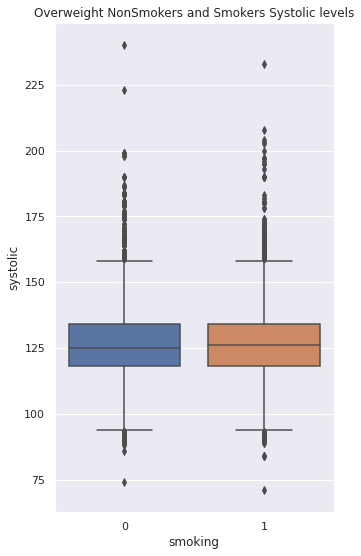

In [ ]:
# Reviewing systolic levels between overweight smokers and nonsmokers on boxplot
sns.set()
plt.figure(figsize=(5,9))
sns.boxplot(y='systolic', x='smoking',data=over25)
plt.title('Overweight NonSmokers and Smokers Systolic levels')

##**Hypothesis #3**
Null Hypothesis #2: 

H₀: µ = µ₀ There is no statistically significant difference between smokers with a BMI over 25 and non-smokers with a BMI over 25 within the serum creatinine level

**Alternate Hypothesis #2:**
*italicized text*
**Hₐ: µ ≠ µ There is a statistically significant difference between smokers with a BMI over 25 and non-smokers with a BMI over 25 within the serum creatinine level**

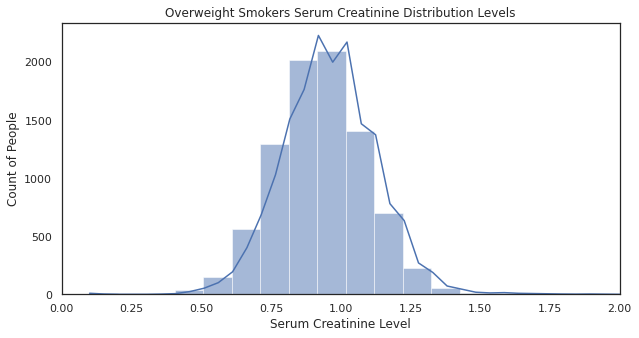

In [ ]:
# Plotting Distribution on Serum Creatinine between Smokers and NonSmokers
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.histplot(overweight_smokers['serum creatinine'], kde=True, bins=100) 
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Count of People')
plt.title('Overweight Smokers Serum Creatinine Distribution Levels')
plt.xlim(0, 2)
plt.show()

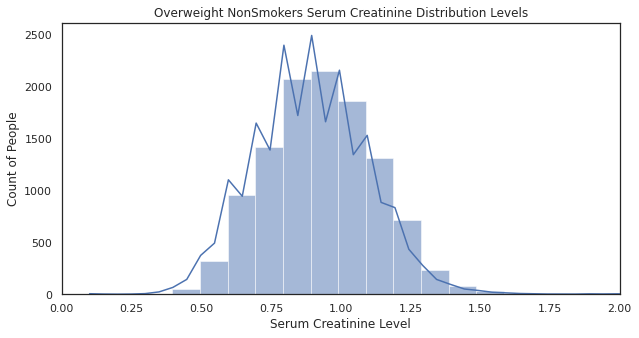

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.histplot(overweight_nonsmokers['serum creatinine'], kde=True, bins=100) 
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Count of People')
plt.title('Overweight NonSmokers Serum Creatinine Distribution Levels')
plt.xlim(0, 2)
plt.show()

In [ ]:
# Calculating TTest 
stats.ttest_ind(overweight_smokers['serum creatinine'],overweight_nonsmokers['serum creatinine'])

Ttest_indResult(statistic=23.108004019923506, pvalue=1.3388202014729204e-116)

In [ ]:
# Calculating Confidence Interval 
ci_smoking = get_95_ci(overweight_nonsmokers['serum creatinine'], overweight_smokers['serum creatinine'])
print(ci_smoking)

The difference in the means at the 95% confidence interval is between 0.06478817101290178 and 0.076555247825436. 


(0.0, 3.5)

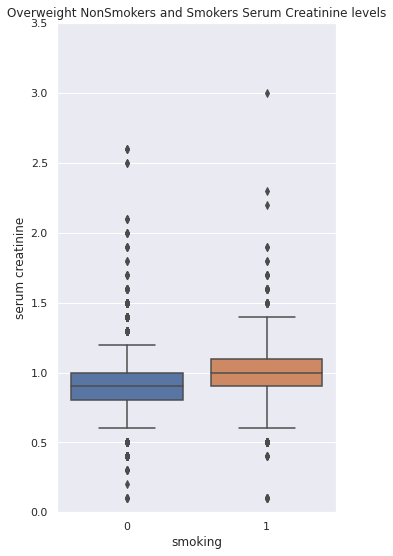

In [ ]:
# Reviewing serum creatinine levels between overweight nonsmokers and smokers on boxplot
sns.set()
plt.figure(figsize=(5,9))
sns.boxplot(y='serum creatinine', x='smoking',data=over25)
plt.title('Overweight NonSmokers and Smokers Serum Creatinine levels')
plt.ylim(0, 3.5)

##**Recommendation**
For my recommendation, we should continiue testing for potential health risks. Smoking and overweight/obesity are botha. global health risk so continuing to test out risk is beneficial for the public to know. I also think this test is valuable for doctors and medical researchers to know when making these discoveries or validating other similar findings as mine. 